# Regression
---

In [ ]:
# Check GPU information
!nvidia-smi

In [5]:
import torch
from scripts.utils import plot_predictions, plot_train_test_loss
from pathlib import Path


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_SEED = 42

## 1. Get data ready (turn into tensor)

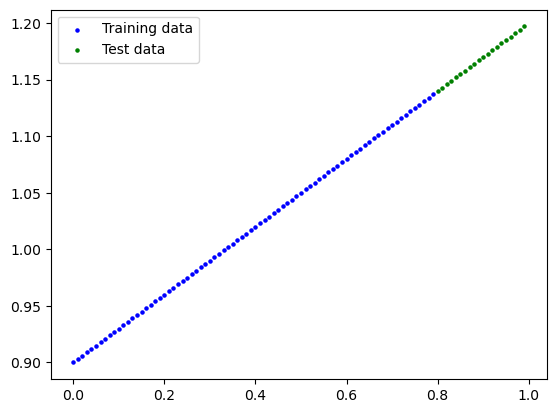

In [6]:
weight, bias = 0.3, 0.9

X = torch.arange(0, 1, 0.01, device=DEVICE, dtype=torch.float32).unsqueeze(dim=1)
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]

y = X * weight + bias
y_train, y_test = y[:train_split], y[train_split:]

plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build or pick a pretrained model for training

In [34]:
from torch import nn


class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, X):
    return self.linear_layer(X)


model = LinearRegressionV2()
model.to(DEVICE)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

### 2.1 Pick loss function and optimizer

In [36]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

### 2.2 Build a training loop to train the model

OrderedDict([('linear_layer.weight', tensor([[0.2926]])), ('linear_layer.bias', tensor([0.8999]))])
0.3 0.9


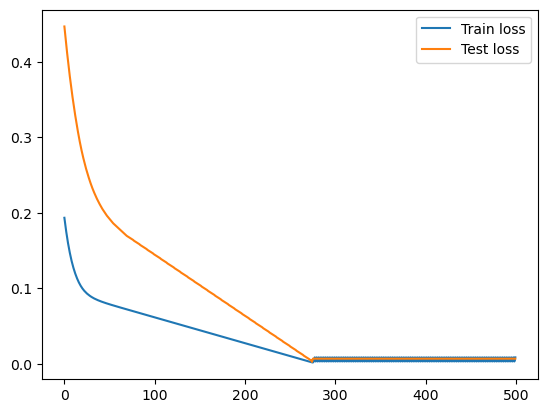

In [37]:
torch.manual_seed(RANDOM_SEED)

EPOCHS = 500
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(EPOCHS):
  epoch_count.append(epoch)

  # train
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  train_loss.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  # evaluate
  model.eval()
  with torch.inference_mode():
    y_pred = model(X_test)
    loss = loss_fn(y_pred, y_test)
    test_loss.append(loss)

print(model.state_dict())
print(weight, bias)

plot_train_test_loss(epoch_count, train_loss, test_loss)

## 3. Make prediction

Loss: 0.006744819693267345


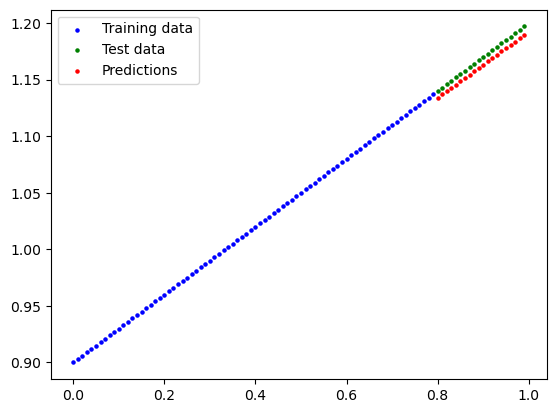

In [38]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)
  loss = loss_fn(y_pred, y_test)

print(f"Loss: {loss}")
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## 4. Evaluate the model

## 5. Improve through experimentation

## 6. Save and reload trained model

In [39]:
# Save the model

model_folder = Path("models")
model_folder.mkdir(parents=True, exist_ok=True)
model_name = "linear_reg_pytorch.pt"
model_path = model_folder / model_name

model.to(device=DEVICE)
torch.save(obj=model.state_dict(), f=model_path)

In [40]:
# Load the model

loaded_model = LinearRegressionV2()
loaded_model.load_state_dict(torch.load(f=model_path))
loaded_model.to(device=DEVICE)
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2926]])),
             ('linear_layer.bias', tensor([0.8999]))])

In [42]:
# Verify if the loading worked correctly

model.eval()
with torch.inference_mode():
  loaded_y_pred = loaded_model(X_test)
  loaded_loss = loss_fn(y_pred, y_test)

print(y_pred == loaded_y_pred)
print(loaded_loss == loss)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])
tensor(True)
